In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')

# Configuration des styles
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [ ]:
df = pd.read_excel('mobility_urban_pollution_300.xlsx')

In [ ]:
df.head()

,route_id,timestamp,latitude,longitude,speed_kmh,traffic_density,air_quality_index,weather
0,R004,2025-08-01 13:17:05,14.69869,-17.35986,42,0.18,45,Rain
1,R008,2025-08-03 23:00:53,14.67364,-17.51332,24,0.54,80,Sunny
2,R004,2025-08-07 20:50:58,14.68798,-17.47673,25,0.39,66,Sunny
3,R014,2025-08-01 15:15:26,14.65846,-17.36022,32,0.33,75,Sunny
4,R007,2025-08-04 01:46:02,14.66586,-17.45096,21,0.43,71,Cloudy


In [ ]:
df.describe()

,latitude,longitude,speed_kmh,traffic_density,air_quality_index
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,14.717840,-17.451813,28.786667,0.311400,63.910000
std,0.038572,0.059410,7.403865,0.168735,12.207593
min,14.650020,-17.549710,10.000000,0.050000,33.000000
25%,14.685437,-17.507530,24.000000,0.180000,55.000000
50%,14.720815,-17.454995,28.500000,0.285000,63.000000
75%,14.751825,-17.401743,33.000000,0.430000,72.250000
max,14.779590,-17.350730,48.000000,0.840000,97.000000


In [ ]:
df.isnull().sum()

,0
route_id,0
timestamp,0
latitude,0
longitude,0
speed_kmh,0
traffic_density,0
air_quality_index,0
weather,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
mo_ur_po = df[['latitude','longitude','speed_kmh','traffic_density','air_quality_index']]

In [ ]:
for col in mo_ur_po:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nValeurs aberrantes dans {col} (IQR method):")
    print(f"Seuil bas: {lower_bound:.2f}, Seuil haut: {upper_bound:.2f}")
    print(f"Nombre d'outliers: {len(outliers)}")



Valeurs aberrantes dans latitude (IQR method):
Seuil bas: 14.59, Seuil haut: 14.85
Nombre d'outliers: 0

Valeurs aberrantes dans longitude (IQR method):
Seuil bas: -17.67, Seuil haut: -17.24
Nombre d'outliers: 0

Valeurs aberrantes dans speed_kmh (IQR method):
Seuil bas: 10.50, Seuil haut: 46.50
Nombre d'outliers: 4

Valeurs aberrantes dans traffic_density (IQR method):
Seuil bas: -0.20, Seuil haut: 0.80
Nombre d'outliers: 1

Valeurs aberrantes dans air_quality_index (IQR method):
Seuil bas: 29.12, Seuil haut: 98.12
Nombre d'outliers: 0


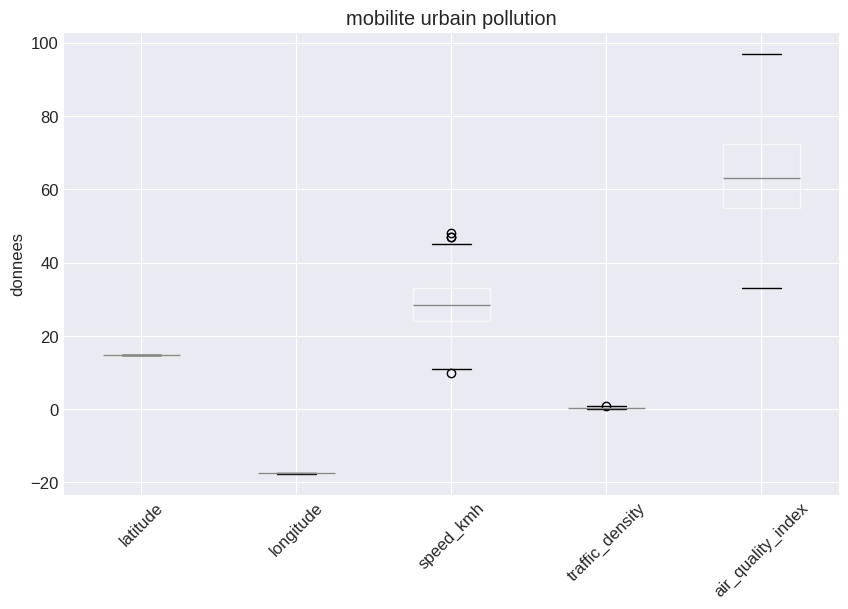

In [ ]:
plt.figure(figsize=(10, 6))
mo_ur_po.boxplot()
plt.title('mobilite urbain pollution')
plt.ylabel('donnees')
plt.xticks(rotation=45)
plt.show()

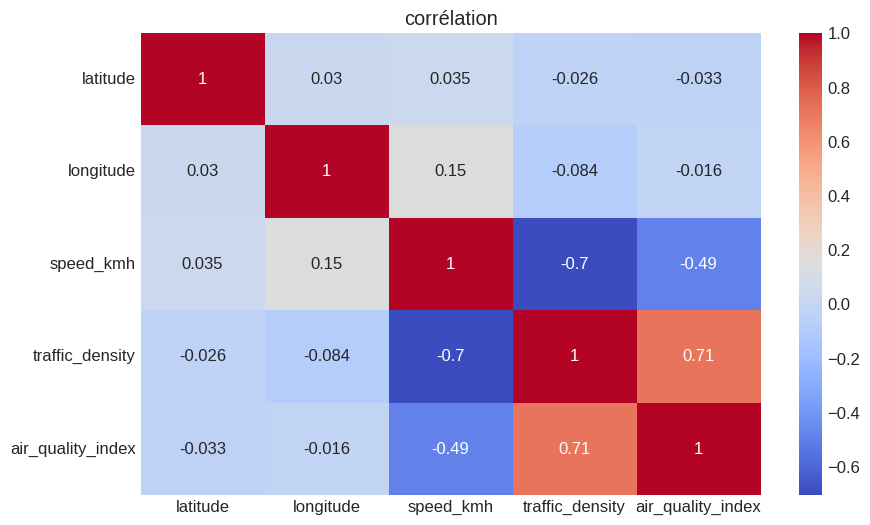

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(mo_ur_po.corr(), annot=True, cmap='coolwarm')
plt.title('corrélation')
plt.show()

In [ ]:
# Installation des bibliothèques nécessaires


# Import des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configuration des styles
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)


df = pd.read_excel('mobility_urban_pollution_300.xlsx')

# Convert 'timestamp' column to datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Ajout d'une colonne heure pour l'analyse temporelle
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['time_of_day'] = pd.cut(df['hour'],
                           bins=[0, 6, 12, 18, 24],
                           labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                           include_lowest=True)

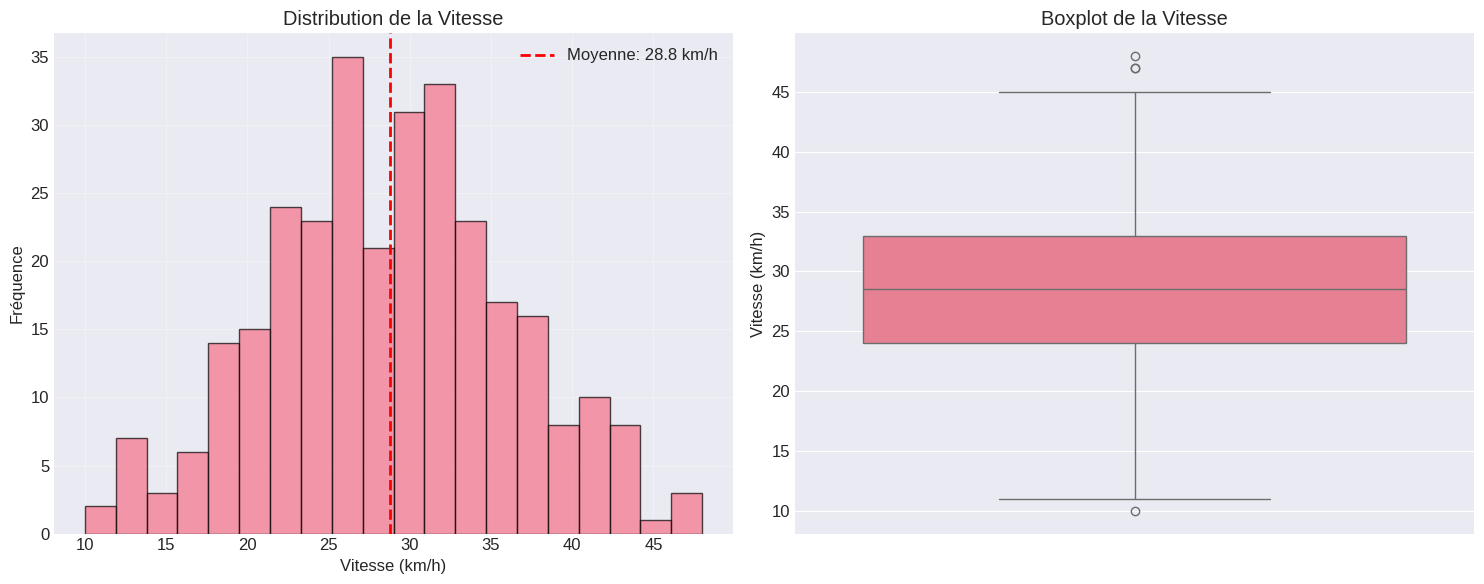

In [ ]:
# 1. Distribution de la vitesse (Histogramme + Boxplot)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogramme
axes[0].hist(df['speed_kmh'], bins=20, edgecolor='black', alpha=0.7)
axes[0].axvline(df['speed_kmh'].mean(), color='red', linestyle='--', linewidth=2, label=f'Moyenne: {df["speed_kmh"].mean():.1f} km/h')
axes[0].set_xlabel('Vitesse (km/h)')
axes[0].set_ylabel('Fréquence')
axes[0].set_title('Distribution de la Vitesse')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Boxplot
sns.boxplot(y=df['speed_kmh'], ax=axes[1])
axes[1].set_ylabel('Vitesse (km/h)')
axes[1].set_title('Boxplot de la Vitesse')

plt.tight_layout()
plt.show()

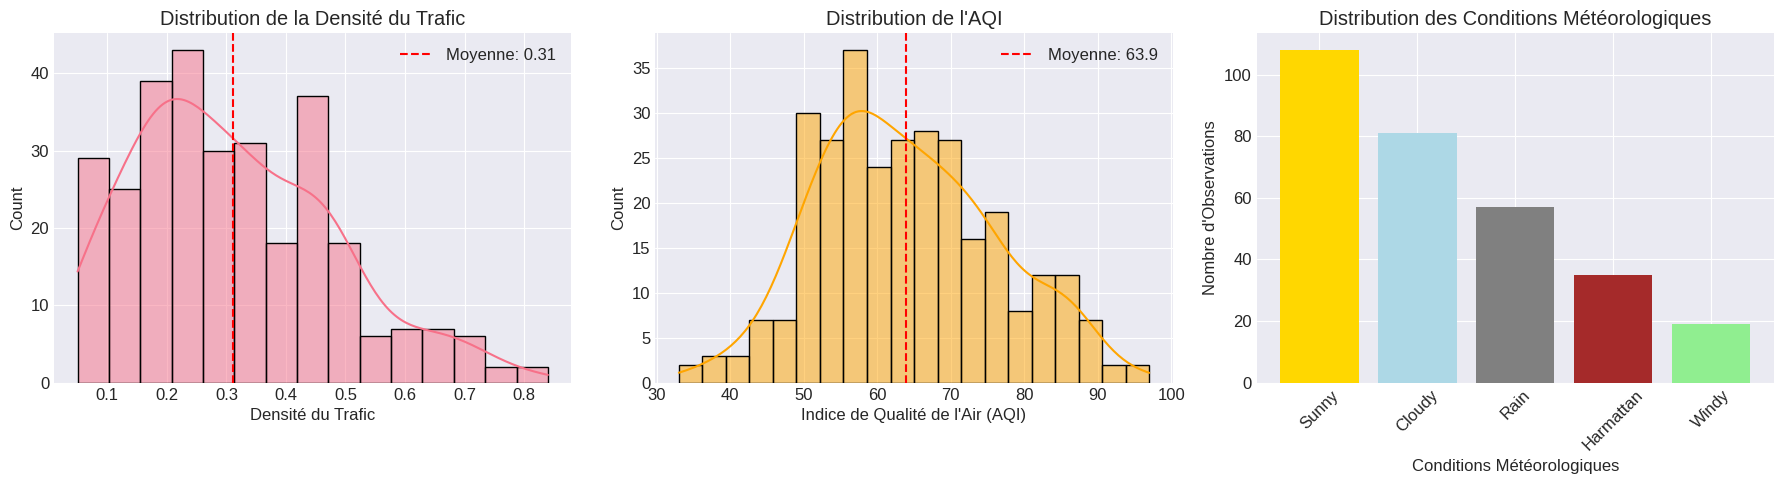

In [ ]:
# 2. Distribution de la densité du trafic et de l'AQI
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Densité du trafic
sns.histplot(df['traffic_density'], kde=True, ax=axes[0], bins=15)
axes[0].axvline(df['traffic_density'].mean(), color='red', linestyle='--',
                label=f'Moyenne: {df["traffic_density"].mean():.2f}')
axes[0].set_xlabel('Densité du Trafic')
axes[0].set_title('Distribution de la Densité du Trafic')
axes[0].legend()

# AQI
sns.histplot(df['air_quality_index'], kde=True, ax=axes[1], bins=20, color='orange')
axes[1].axvline(df['air_quality_index'].mean(), color='red', linestyle='--',
                label=f'Moyenne: {df["air_quality_index"].mean():.1f}')
axes[1].set_xlabel('Indice de Qualité de l\'Air (AQI)')
axes[1].set_title('Distribution de l\'AQI')
axes[1].legend()

# Distribution des conditions météo
weather_counts = df['weather'].value_counts()
axes[2].bar(weather_counts.index, weather_counts.values, color=['gold', 'lightblue', 'gray', 'brown', 'lightgreen'])
axes[2].set_xlabel('Conditions Météorologiques')
axes[2].set_ylabel('Nombre d\'Observations')
axes[2].set_title('Distribution des Conditions Météorologiques')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# 3. Scatter plot: Vitesse vs Densité du trafic avec Plotly
fig = px.scatter(df, x='traffic_density', y='speed_kmh',
                 color='weather',
                 size='air_quality_index',
                 hover_data=['route_id', 'hour'],
                 title='Relation entre Vitesse et Densité du Trafic',
                 labels={'traffic_density': 'Densité du Trafic',
                         'speed_kmh': 'Vitesse (km/h)',
                         'weather': 'Météo'},
                 opacity=0.7)

# Ajout de la ligne de tendance
fig.add_trace(go.Scatter(x=[df['traffic_density'].min(), df['traffic_density'].max()],
                         y=[df['speed_kmh'].max(), df['speed_kmh'].min()],
                         mode='lines',
                         name='Tendance',
                         line=dict(color='red', dash='dash')))

fig.update_layout(showlegend=True)
fig.show()

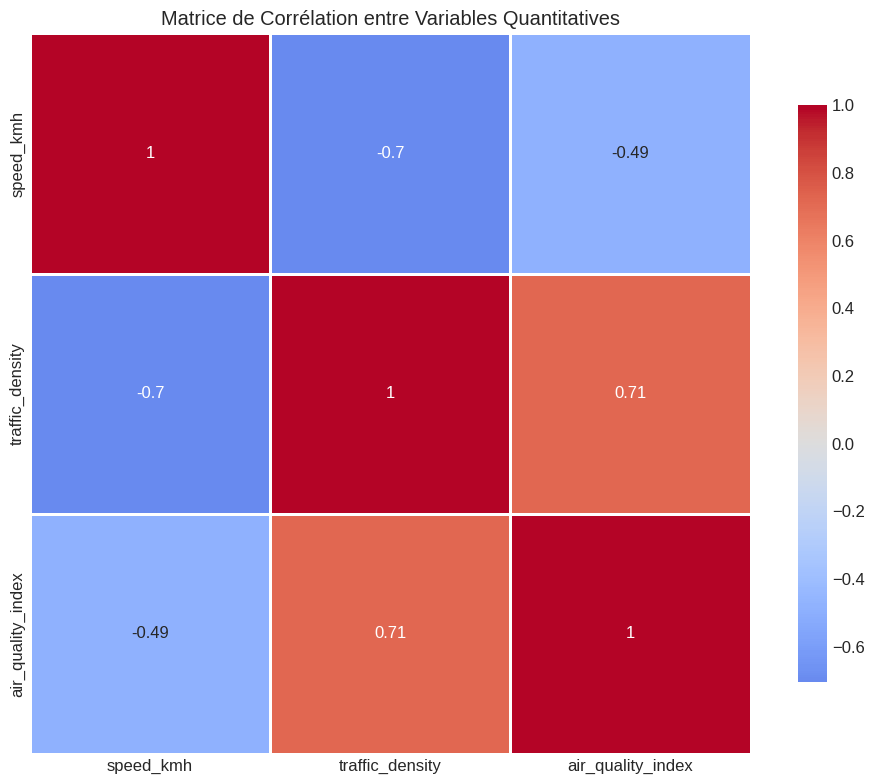

In [ ]:
# 4. Heatmap de corrélation
correlation_matrix = df[['speed_kmh', 'traffic_density', 'air_quality_index']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation entre Variables Quantitatives')
plt.tight_layout()
plt.show()

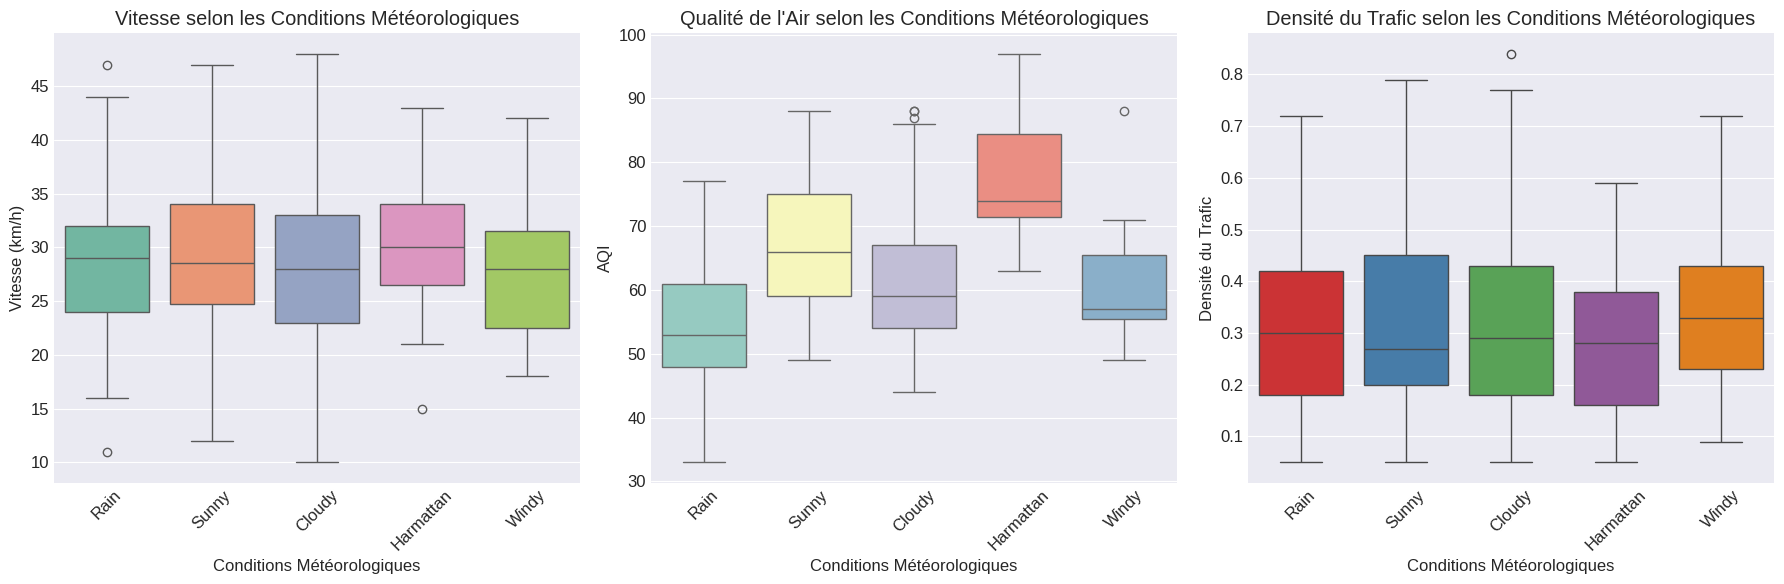

In [ ]:
# 5. Boxplots par condition météorologique
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Vitesse par météo
sns.boxplot(x='weather', y='speed_kmh', data=df, ax=axes[0], palette='Set2')
axes[0].set_xlabel('Conditions Météorologiques')
axes[0].set_ylabel('Vitesse (km/h)')
axes[0].set_title('Vitesse selon les Conditions Météorologiques')
axes[0].tick_params(axis='x', rotation=45)

# AQI par météo
sns.boxplot(x='weather', y='air_quality_index', data=df, ax=axes[1], palette='Set3')
axes[1].set_xlabel('Conditions Météorologiques')
axes[1].set_ylabel('AQI')
axes[1].set_title('Qualité de l\'Air selon les Conditions Météorologiques')
axes[1].tick_params(axis='x', rotation=45)

# Densité par météo
sns.boxplot(x='weather', y='traffic_density', data=df, ax=axes[2], palette='Set1')
axes[2].set_xlabel('Conditions Météorologiques')
axes[2].set_ylabel('Densité du Trafic')
axes[2].set_title('Densité du Trafic selon les Conditions Météorologiques')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# 6. Évolution temporelle avec Plotly
# Agréger par heure
hourly_data = df.groupby('hour').agg({
    'speed_kmh': 'mean',
    'traffic_density': 'mean',
    'air_quality_index': 'mean'
}).reset_index()

fig = make_subplots(rows=3, cols=1,
                    subplot_titles=('Vitesse Moyenne par Heure',
                                    'Densité Moyenne du Trafic par Heure',
                                    'AQI Moyen par Heure'),
                    vertical_spacing=0.1)

# Vitesse
fig.add_trace(go.Scatter(x=hourly_data['hour'], y=hourly_data['speed_kmh'],
                         mode='lines+markers', name='Vitesse',
                         line=dict(color='blue', width=2)),
              row=1, col=1)

# Densité
fig.add_trace(go.Scatter(x=hourly_data['hour'], y=hourly_data['traffic_density'],
                         mode='lines+markers', name='Densité',
                         line=dict(color='red', width=2)),
              row=2, col=1)

# AQI
fig.add_trace(go.Scatter(x=hourly_data['hour'], y=hourly_data['air_quality_index'],
                         mode='lines+markers', name='AQI',
                         line=dict(color='green', width=2)),
              row=3, col=1)

# Mise en page
fig.update_xaxes(title_text="Heure de la Journée", row=3, col=1)
fig.update_yaxes(title_text="Vitesse (km/h)", row=1, col=1)
fig.update_yaxes(title_text="Densité", row=2, col=1)
fig.update_yaxes(title_text="AQI", row=3, col=1)

fig.update_layout(height=800, title_text="Évolution Journalière des Indicateurs",
                  showlegend=False)
fig.show()

<Figure size 1000x800 with 0 Axes>

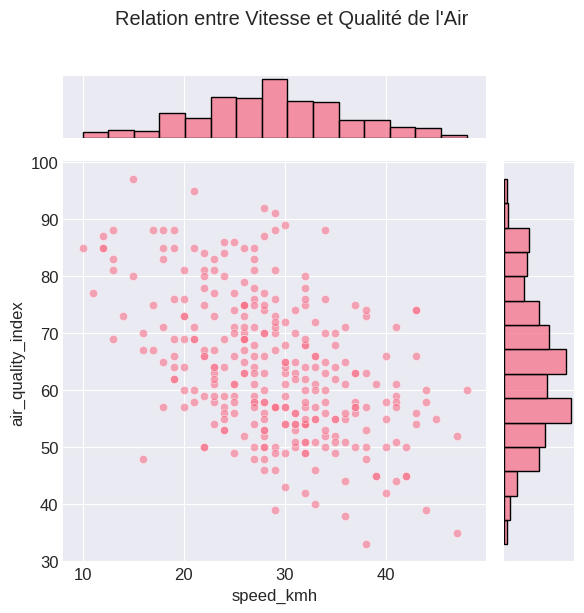

<Figure size 1000x800 with 0 Axes>

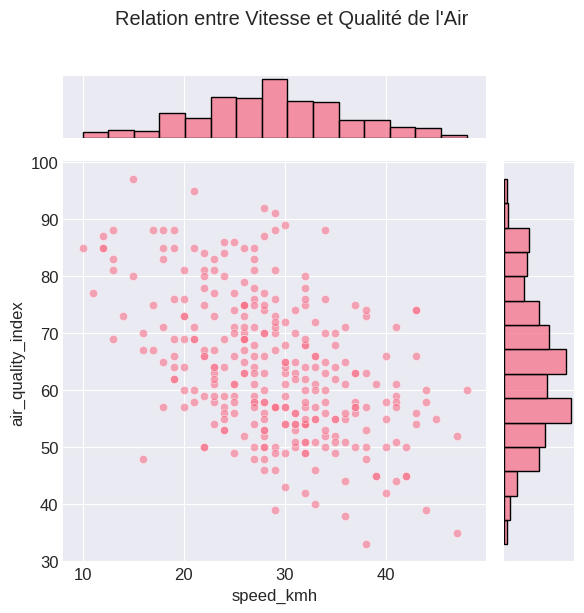

In [ ]:
# 7. Distribution 2D: Vitesse vs AQI avec densité
plt.figure(figsize=(10, 8))
sns.jointplot(x='speed_kmh', y='air_quality_index', data=df,
              kind='scatter', alpha=0.6,
              marginal_kws=dict(bins=15, fill=True))
plt.suptitle('Relation entre Vitesse et Qualité de l\'Air', y=1.02)
plt.tight_layout()
plt.show()# 7. Distribution 2D: Vitesse vs AQI avec densité
plt.figure(figsize=(10, 8))
sns.jointplot(x='speed_kmh', y='air_quality_index', data=df,
              kind='scatter', alpha=0.6,
              marginal_kws=dict(bins=15, fill=True))
plt.suptitle('Relation entre Vitesse et Qualité de l\'Air', y=1.02)
plt.tight_layout()
plt.show()

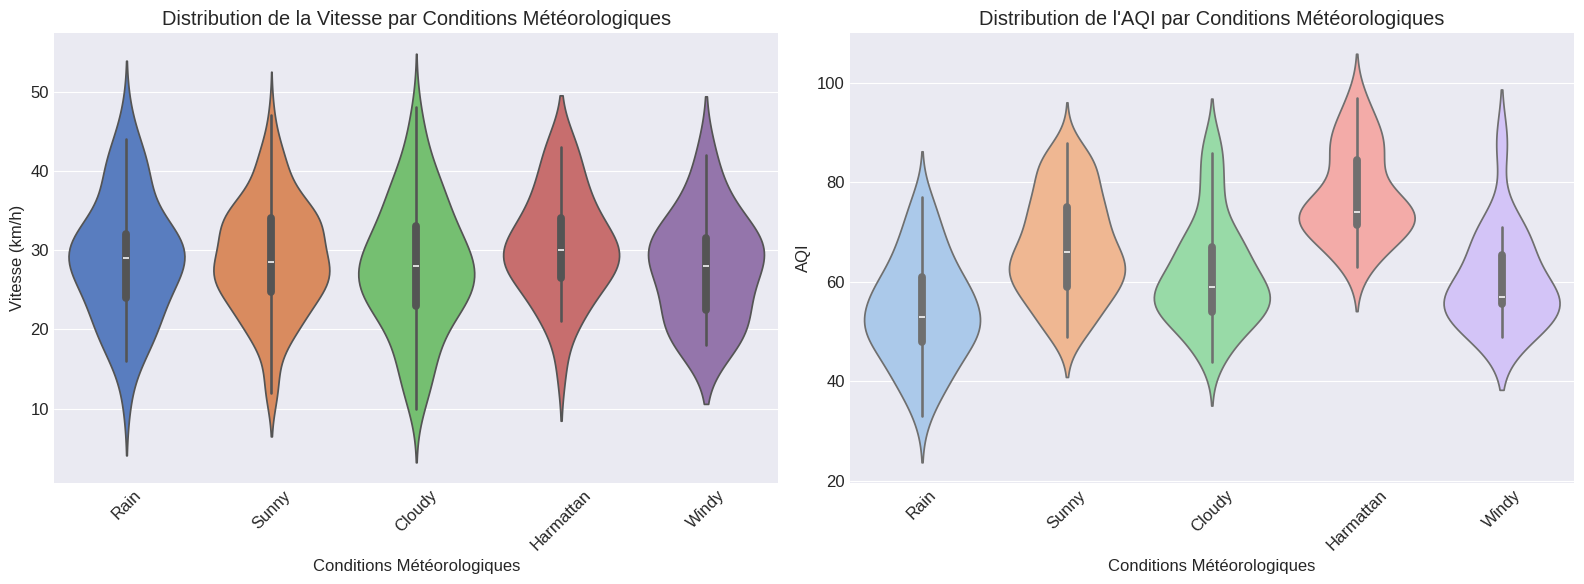

In [ ]:
# 8. Violin plots pour distribution par météo
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Violin plot de la vitesse par météo
sns.violinplot(x='weather', y='speed_kmh', data=df, ax=axes[0], palette='muted')
axes[0].set_xlabel('Conditions Météorologiques')
axes[0].set_ylabel('Vitesse (km/h)')
axes[0].set_title('Distribution de la Vitesse par Conditions Météorologiques')
axes[0].tick_params(axis='x', rotation=45)

# Violin plot de l'AQI par météo
sns.violinplot(x='weather', y='air_quality_index', data=df, ax=axes[1], palette='pastel')
axes[1].set_xlabel('Conditions Météorologiques')
axes[1].set_ylabel('AQI')
axes[1].set_title('Distribution de l\'AQI par Conditions Météorologiques')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# 9. Carte interactive avec Plotly (si les données géographiques étaient réelles)
# Note: Cette visualisation nécessite des coordonnées géographiques réelles
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude",
                        color="air_quality_index",
                        size="traffic_density",
                        hover_data=["speed_kmh", "weather", "route_id"],
                        color_continuous_scale=px.colors.sequential.Viridis,
                        size_max=15,
                        zoom=11,
                        title="Carte Interactive de la Mobilité Urbaine")

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()# 9. Carte interactive avec Plotly (si les données géographiques étaient réelles)
# Note: Cette visualisation nécessite des coordonnées géographiques réelles
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude",
                        color="air_quality_index",
                        size="traffic_density",
                        hover_data=["speed_kmh", "weather", "route_id"],
                        color_continuous_scale=px.colors.sequential.Viridis,
                        size_max=15,
                        zoom=11,
                        title="Carte Interactive de la Mobilité Urbaine")

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()

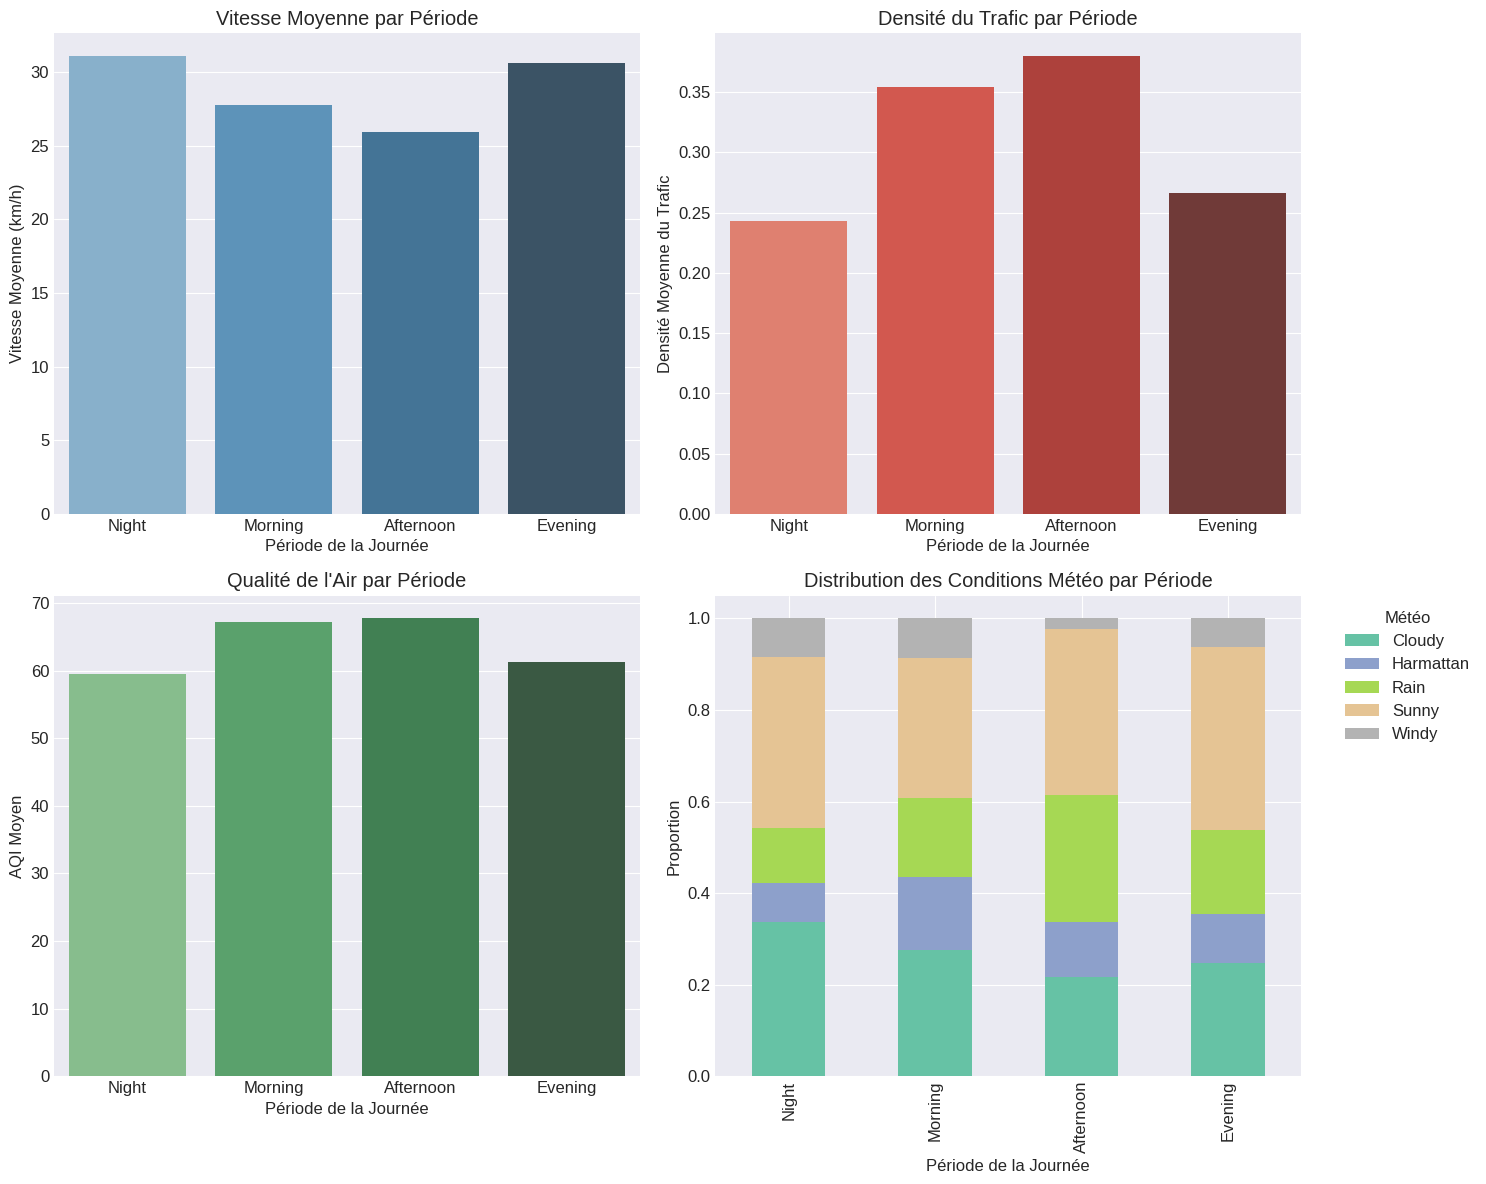

In [ ]:
# 10. Analyse par période de la journée
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Vitesse par période
sns.barplot(x='time_of_day', y='speed_kmh', data=df, ax=axes[0, 0], palette='Blues_d', ci=None)
axes[0, 0].set_xlabel('Période de la Journée')
axes[0, 0].set_ylabel('Vitesse Moyenne (km/h)')
axes[0, 0].set_title('Vitesse Moyenne par Période')

# Densité par période
sns.barplot(x='time_of_day', y='traffic_density', data=df, ax=axes[0, 1], palette='Reds_d', ci=None)
axes[0, 1].set_xlabel('Période de la Journée')
axes[0, 1].set_ylabel('Densité Moyenne du Trafic')
axes[0, 1].set_title('Densité du Trafic par Période')

# AQI par période
sns.barplot(x='time_of_day', y='air_quality_index', data=df, ax=axes[1, 0], palette='Greens_d', ci=None)
axes[1, 0].set_xlabel('Période de la Journée')
axes[1, 0].set_ylabel('AQI Moyen')
axes[1, 0].set_title('Qualité de l\'Air par Période')

# Distribution des conditions météo par période
weather_time = pd.crosstab(df['time_of_day'], df['weather'], normalize='index')
weather_time.plot(kind='bar', stacked=True, ax=axes[1, 1], colormap='Set2')
axes[1, 1].set_xlabel('Période de la Journée')
axes[1, 1].set_ylabel('Proportion')
axes[1, 1].set_title('Distribution des Conditions Météo par Période')
axes[1, 1].legend(title='Météo', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()